<a href="https://colab.research.google.com/github/Seo-Hongju/Hong_test_git01/blob/master/DecisionTree1_lec_%EC%84%9C%ED%99%8D%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# 드라이브 연결
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import os
path = '/gdrive/My Drive/Colab Notebooks/'
os.chdir(path)
os.getcwd()

'/gdrive/My Drive/Colab Notebooks'

### 데이터 불러온 후 df에 저장하기

In [0]:
# Kyphosis 척추후만증 수술 후 통증유무
# absent = 없음
# present = 있음
# Age 나이 (개월수)
# number (수술한 척추의 갯수)
# start (수술경과일 개월)

df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [0]:
# x = 원인 : 독립, 예측, 입력변수
# y = 결과 : 종속, 반응, 출력변수

y = df['Kyphosis']
x = df.drop('Kyphosis', axis=1)

### 데이터 나누기

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, \
                                                    random_state=111)

In [0]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [0]:
# 전처리 작업
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# 예측치 저장
predictions = tree.predict(x_test)
predictions

array(['absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent'], dtype=object)

In [0]:
# 평가 결과 확인
# 정확도(Accuracy) : 양성에 근접한 정도
# 정밀도(precision) : 양성의 분포된 정도
# 재현율(Recall) : 양성 중 정확히 양성이라고 식별된 비율
# F1 Score : 정밀도와 재현율을 모두 사용한 측정항목

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       1.00      0.88      0.93        16
     present       0.33      1.00      0.50         1

    accuracy                           0.88        17
   macro avg       0.67      0.94      0.72        17
weighted avg       0.96      0.88      0.91        17



In [0]:
result = dict()

tree.fit(x_train, y_train)
result['Tree'] = tree.score(x_test, y_test)

gbc     0.647059
Tree    0.882353
rf      0.882353
knn     0.941176
lr      0.941176
svc     0.941176
xgb     0.941176
nb      1.000000
dtype: float64


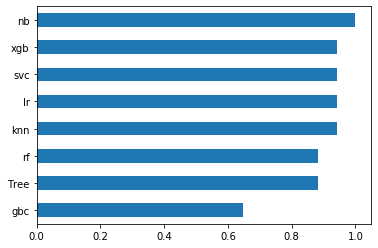

In [0]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
result['nb'] = nb.score(x_test, y_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
result['knn'] = knn.score(x_test, y_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
result['lr'] = lr.score(x_test, y_test)

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
result['svc'] = svc.score(x_test, y_test)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)
result['rf'] = rf.score(x_test, y_test)

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(x_train, y_train)
result['gbc'] = gbc.score(x_test, y_test)

from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)
xgb.fit(x_train, y_train)
result['xgb'] = xgb.score(x_test, y_test)

se1 = pd.Series(result).sort_values()
print(se1)
se1.plot(kind='barh')

In [0]:
# 다른 모델 실험 결과 100% 다시 나옴.
# 결과치가 100%인 것은 신뢰할 수 없으므로 더 심도높은 검증필요.